In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
from math import sqrt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_csv_data = pd.read_csv('./input/013 IndexE8.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
# del df_comp['spx']
# del df_comp['dax']
# del df_comp['ftse']
# del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
# DF: degree of freedom
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit(start_ar_lags=11).llf # extracts Log-Lielihood
    L2 = mod_2.fit(start_ar_lags=11).llf
    LR = (2*(L2-L1)) # compute test statistics
    p = chi2.sf(LR, DF).round(3) # calculate p-value
    return p

In [6]:
df['returns'] = df.market_value.pct_change(1)*100

### ARIMA

In [7]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Tue, 12 May 2020   AIC                          55215.333
Time:                        12:37:40   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

### Residuals of the ARIMA(1,1,1)

Text(0.5, 1.0, 'ACF of Residuals for ARIMA(1,1,1)')

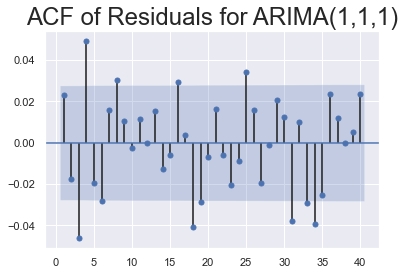

In [8]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:],zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,1)", size = 24)

### Higher-Lag ARIMA Models

In [9]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags = 5)



In [10]:
print(f'\n ARIMA(1,1,1): \tLL = {results_ar_1_i_1_ma_1.llf} \tAIC = {results_ar_1_i_1_ma_1.aic}')
print(f'\n ARIMA(1,1,2): \tLL = {results_ar_1_i_1_ma_2.llf} \tAIC = {results_ar_1_i_1_ma_2.aic}')
print(f'\n ARIMA(1,1,3): \tLL = {results_ar_1_i_1_ma_3.llf} \tAIC = {results_ar_1_i_1_ma_3.aic}')
print(f'\n ARIMA(2,1,1): \tLL = {results_ar_2_i_1_ma_1.llf} \tAIC = {results_ar_2_i_1_ma_1.aic}')
print(f'\n ARIMA(3,1,1): \tLL = {results_ar_3_i_1_ma_1.llf} \tAIC = {results_ar_3_i_1_ma_1.aic}')
print(f'\n ARIMA(3,1,2): \tLL = {results_ar_3_i_1_ma_2.llf} \tAIC = {results_ar_3_i_1_ma_2.aic}')


 ARIMA(1,1,1): 	LL = -27603.66641276545 	AIC = 55215.3328255309

 ARIMA(1,1,2): 	LL = -27600.081863148975 	AIC = 55210.16372629795

 ARIMA(1,1,3): 	LL = -27590.42403265512 	AIC = 55192.84806531024

 ARIMA(2,1,1): 	LL = -27599.807487856524 	AIC = 55209.61497571305

 ARIMA(3,1,1): 	LL = -27592.055371723014 	AIC = 55196.11074344603

 ARIMA(3,1,2): 	LL = -27590.660808989778 	AIC = 55195.321617979556


<b>ARIMA(1,1,3) looks the best but we have to check LLR of ARIMA(1,1,2) and ARIMA(1,1,1) because they nested in ARIMA(1,1,3)</b>

In [11]:
print(f"\nLLR test p-value = {LLR_test(model_ar_1_i_1_ma_2,model_ar_1_i_1_ma_3)}")


LLR test p-value = 0.0


In [12]:
print(f"\nLLR test p-value = {LLR_test(model_ar_1_i_1_ma_1,model_ar_1_i_1_ma_3, DF = 2)}")


LLR test p-value = 0.0


Text(0.5, 1.0, 'ACF of Residuals for ARIMA(1,1,3)')

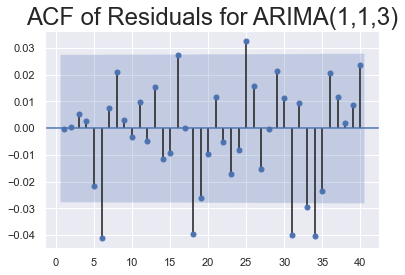

In [13]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:],zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,3)", size = 24)

In [14]:
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags=11)

model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags=11)

In [15]:
print(f'\n ARIMA(1,1,3): \tLL = {results_ar_1_i_1_ma_3.llf} \tAIC = {results_ar_1_i_1_ma_3.aic}')
print(f'\n ARIMA(6,1,3): \tLL = {results_ar_6_i_1_ma_3.llf} \t\tAIC = {results_ar_6_i_1_ma_3.aic}')
print(f'\n ARIMA(5,1,1): \tLL = {results_ar_5_i_1_ma_1.llf} \tAIC = {results_ar_5_i_1_ma_1.aic}')


 ARIMA(1,1,3): 	LL = -27590.42403265512 	AIC = 55192.84806531024

 ARIMA(6,1,3): 	LL = -27583.56532043939 		AIC = 55189.13064087878

 ARIMA(5,1,1): 	LL = -27586.511888123965 	AIC = 55189.02377624793


<b>ARIMA(6,1,3) looks the best</b>

In [16]:
print(f"\nLLR test p-value = {LLR_test(model_ar_1_i_1_ma_3,model_ar_6_i_1_ma_3, DF=5)}")


LLR test p-value = 0.018


In [17]:
print(f"\nLLR test p-value = {LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3, DF=3)}")


LLR test p-value = 0.117


<b>It is mean that ARIMA(6,1,3) is not better then ARIMA(5,1,1)</b>

Text(0.5, 1.0, 'ACF of Residuals for ARIMA(5,1,1)')

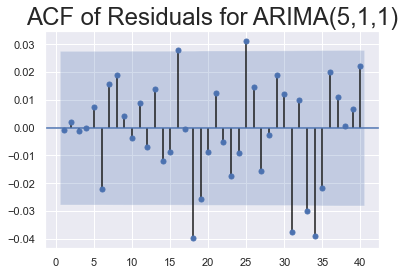

In [18]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:],zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(5,1,1)", size = 24)

In [19]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Tue, 12 May 2020   AIC                          55189.024
Time:                        12:38:00   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5664      0.690      0.820      0.412      -0.787       1.920
ar.L1.D.market_value     0.4011      0.159      2.530      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.163      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4214      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3733           +0.0000j            2.3733            0.0000
-----------------------------------------------------------------------------
"""

### Models wish Higher Levels of Integration

In [20]:
df['delta_prices'] = df.market_value.diff(1)

In [21]:
model_delta_ar_1_i_0_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_0_ma_1 = model_delta_ar_1_i_0_ma_1.fit()
results_delta_ar_1_i_0_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Tue, 12 May 2020   AIC                          55215.333
Time:                        12:38:01   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

We got same results as ARIMA(1,1,1), it means that the delta is a correct calculation

In [22]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

<b>We can say that the data is stationarity and d=1 (integration) is sufficient</b>

### ARIMAX

In [23]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Tue, 12 May 2020   AIC                          55217.112
Time:                        12:42:59   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5893      2.655     -0.222      0.824      -5.792       4.614
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.market_value     0.7462      0.070     10.602      0.000       0.608       0.884
ma.L1.D.market_value    -0.7923      0.064    -12.305      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3400           +0.0000j            1.3400            0.0000
MA.1            1.2622           +0.0000j            1.2622            0.0000
-----------------------------------------------------------------------------
"""

### SARIMAX

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order=(1,1,1), seasonal_order=(2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 5)   Log Likelihood              -26690.649
Date:                           Tue, 12 May 2020   AIC                          53395.298
Time:                                   12:55:47   BIC                          53440.946
Sample:                               01-07-1994   HQIC                         53411.293
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.6947      0.035     76.380      0.000       2.626       2.764
ar.L1          0.2394      0.030      8.097      0.000       0.181       0.297
ma.L1         -0.5303      0.026    -20.728      0.000      -0.580      -0.480
ar.S.L5        0.5776      0.478      1.208      0.227      -0.360       1.515
ar.S.L10       0.0074      0.023      0.324      0.746      -0.037       0.052
ma.S.L5       -0.6085      0.478     -1.272      0.203      -1.546       0.329
sigma2      2430.4415     27.775     87.505      0.000    2376.004    2484.879
===================================================================================
Ljung-Box (Q):                       74.26   Jarque-Bera (JB):              4297.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""